# Pajala ARV Flöden
Data leverarad av Kristofer Grammer <kristofer.gramner@gefasystem.se>. Data bearbetat och diagram skapade av Christian Nilsson med hjälp av Github Copilot.

# Start Virtual Environment

In [14]:
# .\.venv\Scripts\Activate.ps1

# Import data from CSV- or xlsx-files

In [15]:
import inspect
import re
import json
from pathlib import Path
import pandas as pd
def dprint(x): # https://stackoverflow.com/questions/32000934/print-a-variables-name-and-value/57225950#57225950
    frame = inspect.currentframe().f_back
    s = inspect.getframeinfo(frame).code_context[0]
    r = re.search(r"\((.*)\)", s).group(1)
    print("{} = {}".format(r,x))

def _pk1_path_for_file(file_path):
    """Return Path for .pk1 cache file stored next to the input file with same base name and extension '.pk1'."""
    p = Path(file_path) if not isinstance(file_path, Path) else file_path
    return p.with_suffix('.pk1')

def load_or_cache_excel(xlsx_path, read_kwargs=None, force_refresh=False):
    """Load DataFrame from a .pk1 cache next to the xlsx if present; otherwise read the xlsx and save the .pk1.
    Returns the DataFrame.
    read_kwargs: dict forwarded to pd.read_excel.
    force_refresh: if True, re-read the Excel and overwrite cache."""
    read_kwargs = read_kwargs or {}
    pk1 = _pk1_path_for_file(xlsx_path)
    if pk1.exists() and not force_refresh:
        try:
            df = pd.read_pickle(pk1)
            print(f'Loaded cache {pk1}')
            return df
        except Exception as e:
            print(f'Warning: failed to load {pk1} (will re-read Excel): {e}')
    # read Excel and attempt to save cache
    df = pd.read_excel(xlsx_path, **read_kwargs)
    try:
        df.to_pickle(pk1)
        print(f'Saved cache {pk1}')
    except Exception as e:
        print(f'Warning: could not save cache {pk1}: {e}')
    return df

def load_or_cache_csv(csv_path, read_kwargs=None, force_refresh=False):
    """Load DataFrame from a .pk1 cache next to the csv if present; otherwise read the csv and save the .pk1.
    Returns the DataFrame.
    read_kwargs: dict forwarded to pd.read_csv.
    force_refresh: if True, re-read the CSV and overwrite cache."""
    read_kwargs = read_kwargs or {}
    # Set default read parameters for our specific CSV format
    default_params = {
        'sep': ';',  # semicolon separated
        'decimal': ',',  # comma as decimal separator
        'parse_dates': ['TimeDate'],  # parse TimeDate column as datetime
    }
    # Update with any user-provided parameters
    read_kwargs = {**default_params, **read_kwargs}
    
    pk1 = _pk1_path_for_file(csv_path)
    if pk1.exists() and not force_refresh:
        try:
            df = pd.read_pickle(pk1)
            print(f'Loaded cache {pk1}')
            return df
        except Exception as e:
            print(f'Warning: failed to load {pk1} (will re-read CSV): {e}')
    # read CSV and attempt to save cache
    df = pd.read_csv(csv_path, **read_kwargs)
    try:
        df.to_pickle(pk1)
        print(f'Saved cache {pk1}')
    except Exception as e:
        print(f'Warning: could not save cache {pk1}: {e}')
    return df

In [16]:
# Read CSV files (with pk1 cache next to each csv). Uses load_or_cache_csv from previous cell.
csv_file_path_FT10101 = r'c:\Users\chrini\OneDrive - Norconsult Group\Projekt\1097224_Pajala ARV\4 Underlag\Mejl\20251104_1609_Re_ Malmberg Water i Yngsjö - ARV Pajala, åtgärd diverse styrpunkter_Kristofer Gramner\20251104\FT10101.csv'
csv_file_path_FT30101 = r'c:\Users\chrini\OneDrive - Norconsult Group\Projekt\1097224_Pajala ARV\4 Underlag\Mejl\20251104_1609_Re_ Malmberg Water i Yngsjö - ARV Pajala, åtgärd diverse styrpunkter_Kristofer Gramner\20251104\FT30101.csv'
csv_file_path_FT72101 = r'c:\Users\chrini\OneDrive - Norconsult Group\Projekt\1097224_Pajala ARV\4 Underlag\Mejl\20251104_1609_Re_ Malmberg Water i Yngsjö - ARV Pajala, åtgärd diverse styrpunkter_Kristofer Gramner\20251104\FT72101.csv'
csv_file_path_FT80101 = r'c:\Users\chrini\OneDrive - Norconsult Group\Projekt\1097224_Pajala ARV\4 Underlag\Mejl\20251104_1609_Re_ Malmberg Water i Yngsjö - ARV Pajala, åtgärd diverse styrpunkter_Kristofer Gramner\20251104\FT80101.csv'
csv_file_path_LT23101 = r'c:\Users\chrini\OneDrive - Norconsult Group\Projekt\1097224_Pajala ARV\4 Underlag\Mejl\20251104_1609_Re_ Malmberg Water i Yngsjö - ARV Pajala, åtgärd diverse styrpunkter_Kristofer Gramner\20251104\LT23101.csv'

# Load using the helper which places the .pk1 next to the csv with same base name
df_Inflöde_FT10101 = load_or_cache_csv(csv_file_path_FT10101) #Inflöde
df_Utflöde_FT72101 = load_or_cache_csv(csv_file_path_FT72101) #Utflöde
df_MBBRflöde_FT30101 = load_or_cache_csv(csv_file_path_FT30101) #MBBR-flöde
df_Inflöde_Extenslam_FT80101 = load_or_cache_csv(csv_file_path_FT80101) #Inflöde Extenslam
df_Nivå_Bräddning_LT23101 = load_or_cache_csv(csv_file_path_LT23101) #Utflöde Bräddning


Loaded cache c:\Users\chrini\OneDrive - Norconsult Group\Projekt\1097224_Pajala ARV\4 Underlag\Mejl\20251104_1609_Re_ Malmberg Water i Yngsjö - ARV Pajala, åtgärd diverse styrpunkter_Kristofer Gramner\20251104\FT10101.pk1
Loaded cache c:\Users\chrini\OneDrive - Norconsult Group\Projekt\1097224_Pajala ARV\4 Underlag\Mejl\20251104_1609_Re_ Malmberg Water i Yngsjö - ARV Pajala, åtgärd diverse styrpunkter_Kristofer Gramner\20251104\FT72101.pk1
Loaded cache c:\Users\chrini\OneDrive - Norconsult Group\Projekt\1097224_Pajala ARV\4 Underlag\Mejl\20251104_1609_Re_ Malmberg Water i Yngsjö - ARV Pajala, åtgärd diverse styrpunkter_Kristofer Gramner\20251104\FT30101.pk1
Loaded cache c:\Users\chrini\OneDrive - Norconsult Group\Projekt\1097224_Pajala ARV\4 Underlag\Mejl\20251104_1609_Re_ Malmberg Water i Yngsjö - ARV Pajala, åtgärd diverse styrpunkter_Kristofer Gramner\20251104\FT80101.pk1
Loaded cache c:\Users\chrini\OneDrive - Norconsult Group\Projekt\1097224_Pajala ARV\4 Underlag\Mejl\20251104_160

In [17]:
# dprint(df_1.head())
df_Inflöde_FT10101.rename(columns={'TimeDate': 'DateTime', 'Val':'Inflöde FT-10101'}, inplace=True)
df_Inflöde_FT10101['DateTime'] = pd.to_datetime(df_Inflöde_FT10101['DateTime'])
df_Inflöde_FT10101.drop(columns=['ID', 'TimeLength'], inplace=True)
df_Inflöde_FT10101.set_index('DateTime', inplace=True)
# dprint(df_1.head())


# print(df_2.head())
df_Utflöde_FT72101.rename(columns={'TimeDate': 'DateTime', 'Val':'Utflöde FT-72101'}, inplace=True)
df_Utflöde_FT72101['DateTime'] = pd.to_datetime(df_Utflöde_FT72101['DateTime'])
df_Utflöde_FT72101.drop(columns=['ID', 'TimeLength'], inplace=True)
df_Utflöde_FT72101.set_index('DateTime', inplace=True)
dprint(df_Utflöde_FT72101.head())

df_Inflöde_Extenslam_FT80101.rename(columns={'TimeDate': 'DateTime', 'Val':'Inflöde Extenslam FT80101'}, inplace=True)
df_Inflöde_Extenslam_FT80101['DateTime'] = pd.to_datetime(df_Inflöde_Extenslam_FT80101['DateTime'])
df_Inflöde_Extenslam_FT80101.drop(columns=['ID', 'TimeLength'], inplace=True)
df_Inflöde_Extenslam_FT80101.set_index('DateTime', inplace=True)
dprint(df_Inflöde_Extenslam_FT80101.head())
df_Inflöde_Extenslam_FT80101_before_zeroflow_calib = df_Inflöde_Extenslam_FT80101
df_Inflöde_Extenslam_FT80101['Inflöde Extenslam FT80101'] = df_Inflöde_Extenslam_FT80101['Inflöde Extenslam FT80101'] + 0.486474692821503

df_Nivå_Bräddning_LT23101.rename(columns={'TimeDate': 'DateTime', 'Val':'Nivå Bräddning LT23101'}, inplace=True)
df_Nivå_Bräddning_LT23101['DateTime'] = pd.to_datetime(df_Nivå_Bräddning_LT23101['DateTime'])
df_Nivå_Bräddning_LT23101.drop(columns=['ID', 'TimeLength'], inplace=True)
df_Nivå_Bräddning_LT23101.set_index('DateTime', inplace=True)
dprint(df_Nivå_Bräddning_LT23101.head())

df_MBBRflöde_FT30101.rename(columns={'TimeDate': 'DateTime', 'Val':'MBBRflöde FT30101'}, inplace=True)
df_MBBRflöde_FT30101['DateTime'] = pd.to_datetime(df_MBBRflöde_FT30101['DateTime'])
df_MBBRflöde_FT30101.drop(columns=['ID', 'TimeLength'], inplace=True)
df_MBBRflöde_FT30101.set_index('DateTime', inplace=True)
dprint(df_MBBRflöde_FT30101.head())

# Merge the DataFrames on the DateTime index, aligning values
# Using merge instead of concat to handle any duplicate indices
# Merge all DataFrames sequentially
df_ax = pd.merge(df_Inflöde_FT10101, df_Utflöde_FT72101, left_index=True, right_index=True, how='outer')
df_ax = pd.merge(df_ax, df_Inflöde_Extenslam_FT80101, left_index=True, right_index=True, how='outer')
df_ax = pd.merge(df_ax, df_MBBRflöde_FT30101, left_index=True, right_index=True, how='outer')

# Show the result
print("\nMerged DataFrame:")
dprint(df_ax.head())

# Check for any missing values after merge
print("\nMissing values in merged DataFrame:")
dprint(df_ax.isna().sum())


df_Utflöde_FT72101.head() =                      Utflöde FT-72101
DateTime                             
2024-11-01 03:01:00         71.990110
2024-11-01 03:02:00         37.916668
2024-11-01 03:03:00         17.846454
2024-11-01 03:04:00         11.633287
2024-11-01 03:05:00         45.686008
df_Inflöde_Extenslam_FT80101.head() =                      Inflöde Extenslam FT80101
DateTime                                      
2024-11-01 03:01:00                  -0.486475
2024-11-01 03:02:00                  -0.486475
2024-11-01 03:03:00                  -0.486475
2024-11-01 03:04:00                  -0.486475
2024-11-01 03:05:00                  -0.486475
df_Nivå_Bräddning_LT23101.head() =                      Nivå Bräddning LT23101
DateTime                                   
2024-11-01 03:01:00                0.148113
2024-11-01 03:02:00                0.148113
2024-11-01 03:03:00                0.148113
2024-11-01 03:04:00                0.148113
2024-11-01 03:05:00                0.148

In [18]:
# Show all column names to verify what needs renaming
print("Columns in df_Inflöde_FT10101:", df_Inflöde_FT10101.columns.tolist())
print("Columns in df_Utflöde_FT72101:", df_Utflöde_FT72101.columns.tolist())
print("Columns in df_ax:", df_ax.columns.tolist())

Columns in df_Inflöde_FT10101: ['Inflöde FT-10101']
Columns in df_Utflöde_FT72101: ['Utflöde FT-72101']
Columns in df_ax: ['Inflöde FT-10101', 'Utflöde FT-72101', 'Inflöde Extenslam FT80101', 'MBBRflöde FT30101']


In [19]:
# Show DateTime indices where there are missing values
print("\nDateTime indices with missing FT-10101:")
print(df_ax[df_ax['Inflöde FT-10101'].isna()].index.strftime('%Y-%m-%d %H:%M:%S').tolist())

print("\nDateTime indices with missing FT-72101:")
print(df_ax[df_ax['Utflöde FT-72101'].isna()].index.strftime('%Y-%m-%d %H:%M:%S').tolist())

# Print summary of gaps
print("\nSummary of gaps:")
print(f"Total rows in merged DataFrame: {len(df_ax)}")
print(f"Rows with missing FT-10101: {df_ax['Inflöde FT-10101'].isna().sum()}")
print(f"Rows with missing FT-72101: {df_ax['Utflöde FT-72101'].isna().sum()}")
print(f"Rows with data in both columns: {len(df_ax) - df_ax.isna().any(axis=1).sum()}")


DateTime indices with missing FT-10101:
['2025-11-04 15:44:00', '2025-11-04 15:45:00', '2025-11-04 15:46:00', '2025-11-04 15:47:00', '2025-11-04 15:48:00', '2025-11-04 15:49:00', '2025-11-04 15:50:00']

DateTime indices with missing FT-72101:
['2025-11-04 15:50:00']

Summary of gaps:
Total rows in merged DataFrame: 513892
Rows with missing FT-10101: 7
Rows with missing FT-72101: 1
Rows with data in both columns: 513885


# Check and Remove Duplicate Timestamps
Before calculating moving averages, we need to identify and remove any duplicate timestamps from the source data.

In [20]:
# Collect all duplicate timestamps before removing them
df_duplicate_timestamps = pd.DataFrame()

# Helper function to collect duplicates from a DataFrame
def collect_duplicates(df, df_name):
    """Collect duplicate rows and return them with a source column."""
    if df.index.duplicated().any():
        dup_mask = df.index.duplicated(keep=False)  # Mark ALL duplicates, not just subsequent ones
        dup_rows = df[dup_mask].copy()
        dup_rows['Source'] = df_name
        dup_rows['DuplicateGroup'] = dup_rows.index.astype(str)
        return dup_rows
    return pd.DataFrame()

# Check for and collect duplicate indices before removal
frames_to_check = {
    'df_ax': df_ax,
    'df_Inflöde_Extenslam_FT80101': df_Inflöde_Extenslam_FT80101,
    'df_Nivå_Bräddning_LT23101': df_Nivå_Bräddning_LT23101,
    'df_MBBRflöde_FT30101': df_MBBRflöde_FT30101
}

duplicate_collections = []
for name, df_frame in frames_to_check.items():
    if df_frame.index.duplicated().any():
        dup_count = df_frame.index.duplicated().sum()
        print(f"Warning: {name} has {dup_count} duplicate indices. Keeping first occurrence.")
        
        # Collect duplicates
        dup_df = collect_duplicates(df_frame, name)
        if not dup_df.empty:
            duplicate_collections.append(dup_df)
        
        # Remove duplicates from the original frame
        if name == 'df_ax':
            df_ax = df_ax[~df_ax.index.duplicated(keep='first')]
        elif name == 'df_Inflöde_Extenslam_FT80101':
            df_Inflöde_Extenslam_FT80101 = df_Inflöde_Extenslam_FT80101[~df_Inflöde_Extenslam_FT80101.index.duplicated(keep='first')]
        elif name == 'df_Nivå_Bräddning_LT23101':
            df_Nivå_Bräddning_LT23101 = df_Nivå_Bräddning_LT23101[~df_Nivå_Bräddning_LT23101.index.duplicated(keep='first')]
        elif name == 'df_MBBRflöde_FT30101':
            df_MBBRflöde_FT30101 = df_MBBRflöde_FT30101[~df_MBBRflöde_FT30101.index.duplicated(keep='first')]

# Combine all duplicate collections into one DataFrame
if duplicate_collections:
    df_duplicate_timestamps = pd.concat(duplicate_collections, axis=0)
    df_duplicate_timestamps = df_duplicate_timestamps.sort_values(['DuplicateGroup', 'Source'])
    print(f"\nTotal duplicate rows collected: {len(df_duplicate_timestamps)}")
    print(f"Unique duplicate timestamps: {df_duplicate_timestamps.index.nunique()}")
    
    # Save to CSV
    csv_path = 'duplicate_timestamps.csv'
    df_duplicate_timestamps.to_csv(csv_path)
    print(f"Duplicate timestamps saved to: {csv_path}")
else:
    print("\nNo duplicates found in any DataFrame.")

print(f"\nCleaned DataFrame sizes:")
print(f"  df_ax: {len(df_ax)} rows")
print(f"  df_Inflöde_Extenslam_FT80101: {len(df_Inflöde_Extenslam_FT80101)} rows")
print(f"  df_Nivå_Bräddning_LT23101: {len(df_Nivå_Bräddning_LT23101)} rows")
print(f"  df_MBBRflöde_FT30101: {len(df_MBBRflöde_FT30101)} rows")


Total duplicate rows collected: 22
Unique duplicate timestamps: 1
Duplicate timestamps saved to: duplicate_timestamps.csv

Cleaned DataFrame sizes:
  df_ax: 513877 rows
  df_Inflöde_Extenslam_FT80101: 513877 rows
  df_Nivå_Bräddning_LT23101: 513892 rows
  df_MBBRflöde_FT30101: 513874 rows

Total duplicate rows collected: 22
Unique duplicate timestamps: 1
Duplicate timestamps saved to: duplicate_timestamps.csv

Cleaned DataFrame sizes:
  df_ax: 513877 rows
  df_Inflöde_Extenslam_FT80101: 513877 rows
  df_Nivå_Bräddning_LT23101: 513892 rows
  df_MBBRflöde_FT30101: 513874 rows

Total duplicate rows collected: 22
Unique duplicate timestamps: 1
Duplicate timestamps saved to: duplicate_timestamps.csv

Cleaned DataFrame sizes:
  df_ax: 513877 rows
  df_Inflöde_Extenslam_FT80101: 513877 rows
  df_Nivå_Bräddning_LT23101: 513892 rows
  df_MBBRflöde_FT30101: 513874 rows


In [21]:
# Summary of duplicate timestamps
if not df_duplicate_timestamps.empty:
    print("=" * 60)
    print("DUPLICATE TIMESTAMPS SUMMARY")
    print("=" * 60)
    print(f"Total duplicate rows captured: {len(df_duplicate_timestamps)}")
    print(f"Number of unique duplicate timestamps: {df_duplicate_timestamps.index.nunique()}")
    
    print("\nDuplicates by source DataFrame:")
    source_counts = df_duplicate_timestamps.groupby('Source').size()
    for source, count in source_counts.items():
        print(f"  {source}: {count} rows")
    
    print("\nUnique timestamps that appear multiple times:")
    unique_dups = sorted(df_duplicate_timestamps.index.unique())
    for ts in unique_dups:
        print(f"  {ts.strftime('%Y-%m-%d %H:%M:%S')}")
    
    # Show a sample of the data for one duplicate timestamp
    print("\nExample: Data for first duplicate timestamp")
    first_dup = unique_dups[0]
    sample = df_duplicate_timestamps[df_duplicate_timestamps.index == first_dup]
    print(sample.to_string())
    
    # Optionally save to CSV
    csv_path = 'duplicate_timestamps.csv'
    df_duplicate_timestamps.to_csv(csv_path)
    print(f"\nDuplicate timestamps saved to: {csv_path}")


DUPLICATE TIMESTAMPS SUMMARY
Total duplicate rows captured: 22
Number of unique duplicate timestamps: 1

Duplicates by source DataFrame:
  df_Inflöde_Extenslam_FT80101: 2 rows
  df_MBBRflöde_FT30101: 2 rows
  df_Nivå_Bräddning_LT23101: 2 rows
  df_ax: 16 rows

Unique timestamps that appear multiple times:
  2025-07-07 07:47:00

Example: Data for first duplicate timestamp
                     Inflöde FT-10101  Utflöde FT-72101  Inflöde Extenslam FT80101  MBBRflöde FT30101                        Source       DuplicateGroup  Nivå Bräddning LT23101
DateTime                                                                                                                                                                        
2025-07-07 07:47:00               NaN               NaN                        0.0                NaN  df_Inflöde_Extenslam_FT80101  2025-07-07 07:47:00                     NaN
2025-07-07 07:47:00               NaN               NaN                        0.0             

In [22]:
# Display duplicate timestamps if any were found
if 'df_duplicate_timestamps' in locals() and not df_duplicate_timestamps.empty:
    print(f"Duplicate timestamps DataFrame shape: {df_duplicate_timestamps.shape}")
    print("\nFirst few duplicate rows:")
    print(df_duplicate_timestamps.head(20))
    
    # Show summary by source
    print("\nDuplicates by source:")
    print(df_duplicate_timestamps.groupby('Source').size())
    
    # Show the actual duplicate timestamps
    print("\nUnique duplicate timestamps:")
    print(sorted(df_duplicate_timestamps.index.unique().strftime('%Y-%m-%d %H:%M:%S').tolist()))
else:
    print("No duplicates were found or df_duplicate_timestamps is empty.")
    print("\nNote: If you previously had duplicates, you may need to:")
    print("1. Re-run the data loading cells (cells 4-5)")
    print("2. Then re-run the moving averages cell to capture duplicates")


Duplicate timestamps DataFrame shape: (22, 7)

First few duplicate rows:
                     Inflöde FT-10101  Utflöde FT-72101  \
DateTime                                                  
2025-07-07 07:47:00               NaN               NaN   
2025-07-07 07:47:00               NaN               NaN   
2025-07-07 07:47:00               NaN               NaN   
2025-07-07 07:47:00               NaN               NaN   
2025-07-07 07:47:00               NaN               NaN   
2025-07-07 07:47:00               NaN               NaN   
2025-07-07 07:47:00         94.965556         38.107736   
2025-07-07 07:47:00         94.965556         38.107736   
2025-07-07 07:47:00         94.965556         38.107736   
2025-07-07 07:47:00         94.965556         38.107736   
2025-07-07 07:47:00         94.965556         38.107736   
2025-07-07 07:47:00         94.965556         38.107736   
2025-07-07 07:47:00         94.965556         38.107736   
2025-07-07 07:47:00         94.965556     

# Calculate Velocity for FT-10101
Convert flow rate (m³/s) to velocity (m/s) using pipe inside diameter of 300 mm.

In [23]:
import numpy as np

# Pipe inside diameter in meters
diameter_m = 0.300  # 300 mm = 0.3 m

# Calculate cross-sectional area: A = π × (d/2)²
area_m2 = np.pi * (diameter_m / 2) ** 2

print(f"Pipe inside diameter: {diameter_m * 1000} mm")
print(f"Cross-sectional area: {area_m2:.6f} m²")

# Calculate velocity: v = Q / A
# df_ax['Inflöde FT-10101'] is in m³/s (assuming flow rate units)
# Velocity will be in m/s
df_Inflöde_FT10101_mps = pd.DataFrame(index=df_ax.index)
df_Inflöde_FT10101_mps['Inflöde FT-10101 [m/s]'] = df_ax['Inflöde FT-10101'] / 3.6 / 1000 / area_m2

print(f"\nVelocity statistics:")
print(df_Inflöde_FT10101_mps['Inflöde FT-10101 [m/s]'].describe())
print(f"\nFirst few values:")
print(df_Inflöde_FT10101_mps.head())

Pipe inside diameter: 300.0 mm
Cross-sectional area: 0.070686 m²

Velocity statistics:
count    5.138700e+05
mean     1.385685e-01
std      5.307203e-02
min     -6.012520e-08
25%      1.078246e-01
50%      1.340951e-01
75%      1.617729e-01
max      7.404189e-01
Name: Inflöde FT-10101 [m/s], dtype: float64

First few values:
                     Inflöde FT-10101 [m/s]
DateTime                                   
2024-11-01 03:01:00                0.189270
2024-11-01 03:02:00                0.209686
2024-11-01 03:03:00                0.190091
2024-11-01 03:04:00                0.173654
2024-11-01 03:05:00                0.097369


# Calculate Moving Averages for Velocity
Apply the same time-based moving average windows (1h, 24h, 7d) to the velocity data.

In [24]:
# Calculate moving averages for velocity data
# Prepare container for velocity moving averages
df_velocity_ma = pd.DataFrame(index=df_Inflöde_FT10101_mps.index)

# Define the same time-based windows as used for flows
#windows_velocity = { '12min': '12min', '1h': '60min', '24h': '24h', '7d': '7D' }
windows_velocity = {'1h': '60min', '24h': '24h', '7d': '7D' }

for col in df_Inflöde_FT10101_mps.columns:
    for w_label, w_offset in windows_velocity.items():
        # Use time-based rolling which is robust to missing/irregular timestamps
        ma = df_Inflöde_FT10101_mps[col].rolling(w_offset, min_periods=1).mean()
        ma_col_name = f"{col}_MA_{w_label}"
        df_velocity_ma[ma_col_name] = ma

# Concat original velocity data with its moving averages
df_velocity_with_ma = pd.concat([df_Inflöde_FT10101_mps, df_velocity_ma], axis=1)

print("Velocity DataFrame with Moving Averages:")
print(f"Shape: {df_velocity_with_ma.shape}")
print(f"Columns: {df_velocity_with_ma.columns.tolist()}")
print("\nFirst few rows:")
print(df_velocity_with_ma.head())

Velocity DataFrame with Moving Averages:
Shape: (513877, 4)
Columns: ['Inflöde FT-10101 [m/s]', 'Inflöde FT-10101 [m/s]_MA_1h', 'Inflöde FT-10101 [m/s]_MA_24h', 'Inflöde FT-10101 [m/s]_MA_7d']

First few rows:
                     Inflöde FT-10101 [m/s]  Inflöde FT-10101 [m/s]_MA_1h  \
DateTime                                                                    
2024-11-01 03:01:00                0.189270                      0.189270   
2024-11-01 03:02:00                0.209686                      0.199478   
2024-11-01 03:03:00                0.190091                      0.196349   
2024-11-01 03:04:00                0.173654                      0.190675   
2024-11-01 03:05:00                0.097369                      0.172014   

                     Inflöde FT-10101 [m/s]_MA_24h  \
DateTime                                             
2024-11-01 03:01:00                       0.189270   
2024-11-01 03:02:00                       0.199478   
2024-11-01 03:03:00               

# Compute Overflow Rate from Level Data

# Create and Manage Threshold Dataframe

Create a threshold dataframe `df_Tröskelnivå_LT23101` with the same index as the level data. This allows manually setting different H_threshold values for different time periods (since the threshold level appears to have changed over time).

The threshold values are saved to and loaded from a CSV file so you can manually edit them between runs.

In [ ]:
# Define path for threshold CSV file (stored in same directory as this notebook)
threshold_csv_path = Path(__file__).parent / 'Tröskelnivå_LT23101.csv' if '__file__' in globals() else Path('Tröskelnivå_LT23101.csv')

def create_threshold_dataframe(reference_df, default_threshold=0.25):
    """Create a threshold dataframe with the same index as reference_df.
    
    Args:
        reference_df: DataFrame with DateTime index to match
        default_threshold: Default threshold value in meters
    
    Returns:
        DataFrame with 'H_threshold' column
    """
    df_threshold = pd.DataFrame(
        data={'H_threshold': default_threshold},
        index=reference_df.index
    )
    return df_threshold

def save_threshold_to_csv(df_threshold, filepath):
    """Save threshold dataframe to CSV for manual editing.
    
    Args:
        df_threshold: DataFrame with DateTime index and H_threshold column
        filepath: Path to save CSV file
    """
    df_threshold.to_csv(filepath, sep=';', decimal=',', date_format='%Y-%m-%d %H:%M:%S')
    print(f'Saved threshold data to {filepath}')
    print(f'You can manually edit this file to set different H_threshold values for different time periods.')

def load_threshold_from_csv(filepath, reference_df):
    """Load threshold dataframe from CSV, or create default if file doesn't exist.
    
    Args:
        filepath: Path to CSV file
        reference_df: DataFrame with DateTime index to match if creating new
    
    Returns:
        DataFrame with 'H_threshold' column
    """
    if Path(filepath).exists():
        df_threshold = pd.read_csv(
            filepath, 
            sep=';', 
            decimal=',',
            parse_dates=[0],
            index_col=0
        )
        print(f'Loaded threshold data from {filepath}')
        
        # Verify it has the expected column
        if 'H_threshold' not in df_threshold.columns:
            print(f'Warning: CSV does not contain H_threshold column. Creating default.')
            return create_threshold_dataframe(reference_df)
            
        return df_threshold
    else:
        print(f'Threshold file {filepath} not found. Creating default.')
        df_threshold = create_threshold_dataframe(reference_df)
        save_threshold_to_csv(df_threshold, filepath)
        return df_threshold

# Create or load the threshold dataframe
df_Tröskelnivå_LT23101 = load_threshold_from_csv(threshold_csv_path, df_Nivå_Bräddning_LT23101)

# Display info
print(f'\nThreshold dataframe shape: {df_Tröskelnivå_LT23101.shape}')
print(f'Level dataframe shape: {df_Nivå_Bräddning_LT23101.shape}')
print(f'\nFirst few threshold values:')
print(df_Tröskelnivå_LT23101.head())
print(f'\nThreshold statistics:')
print(df_Tröskelnivå_LT23101['H_threshold'].describe())

## Helper Function: Update Threshold for Specific Time Range

You can use this cell to programmatically set threshold values for specific date ranges instead of manually editing the CSV.

In [ ]:
def update_threshold_for_period(df_threshold, start_date, end_date, new_threshold_value):
    """Update threshold values for a specific date range.
    
    Args:
        df_threshold: The threshold dataframe to modify
        start_date: Start date (string or datetime)
        end_date: End date (string or datetime)
        new_threshold_value: New H_threshold value in meters
    
    Returns:
        Modified dataframe
    
    Example:
        df_Tröskelnivå_LT23101 = update_threshold_for_period(
            df_Tröskelnivå_LT23101, 
            '2024-01-01', 
            '2024-06-30', 
            0.28
        )
    """
    start = pd.to_datetime(start_date)
    end = pd.to_datetime(end_date)
    
    mask = (df_threshold.index >= start) & (df_threshold.index <= end)
    affected_rows = mask.sum()
    
    df_threshold.loc[mask, 'H_threshold'] = new_threshold_value
    
    print(f'Updated {affected_rows:,} rows from {start} to {end}')
    print(f'New threshold value: {new_threshold_value} m')
    
    return df_threshold

# Example usage (commented out - uncomment and modify as needed):
# df_Tröskelnivå_LT23101 = update_threshold_for_period(df_Tröskelnivå_LT23101, '2024-01-01', '2024-12-31', 0.28)
# save_threshold_to_csv(df_Tröskelnivå_LT23101, threshold_csv_path)  # Save after updating

Computed df_Utflöde_Bräddning_LT23101:
df_Utflöde_Bräddning_LT23101.head() =                      Utflöde Bräddning LT23101
DateTime                                      
2024-11-01 03:01:00                        0.0
2024-11-01 03:02:00                        0.0
2024-11-01 03:03:00                        0.0
2024-11-01 03:04:00                        0.0
2024-11-01 03:05:00                        0.0
df_Utflöde_Bräddning_LT23101: 513892 rows
Merged into df_ax. df_ax now has 5 columns.


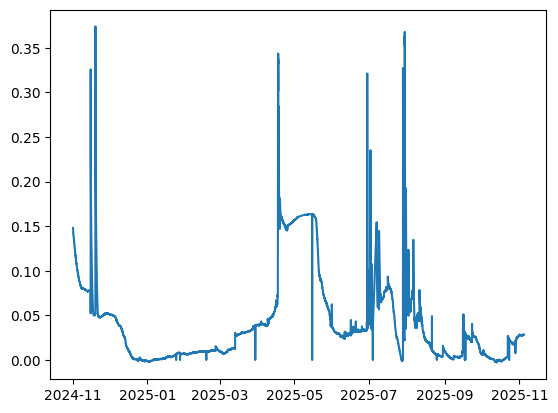

In [ ]:
# Compute overflow rate from level df_Nivå_Bräddning_LT23101 -> df_Utflöde_Bräddning_LT23101
from matplotlib.pyplot import plot
import numpy as np

# Constants for the V-notch weir formula (Excel equivalent):
# =IF(E2<H_threshold;0;0.58*8/15*TAN(RADIANS(100)/2) * (E2-H)^(2.5) * SQRT(2*g) * 3600)
# H_threshold is now loaded from df_Tröskelnivå_LT23101 (can vary over time)
angle_deg = 100.0   # degrees for the V-notch angle
g = 9.81            # m/s^2

# Prepare head above crest using the time-varying threshold
level_col = 'Nivå Bräddning LT23101'
threshold_col = 'H_threshold'

# Align the threshold dataframe with the level dataframe (in case indices don't match perfectly)
df_aligned_threshold = df_Tröskelnivå_LT23101.reindex(df_Nivå_Bräddning_LT23101.index, method='ffill')

# Calculate head above crest (clipped at 0)
head = (df_Nivå_Bräddning_LT23101[level_col] - df_aligned_threshold[threshold_col]).clip(lower=0.0)

# Precompute constant multiplier K = 0.58*8/15*TAN(RADIANS(100)/2)*SQRT(2*g)*3600
K = 0.58 * (8.0/15.0) * np.tan(np.radians(angle_deg)/2.0) * np.sqrt(2.0 * g) * 3600.0

# Flow [m3/h]
flow_m3h = K * np.power(head, 2.5)

# Build resulting DataFrame
df_Utflöde_Bräddning_LT23101 = pd.DataFrame(
    data={'Utflöde Bräddning LT23101': flow_m3h},
    index=df_Nivå_Bräddning_LT23101.index
)

# Check for and remove duplicates in the overflow DataFrame
if df_Utflöde_Bräddning_LT23101.index.duplicated().any():
    dup_count = df_Utflöde_Bräddning_LT23101.index.duplicated().sum()
    print(f"Warning: df_Utflöde_Bräddning_LT23101 has {dup_count} duplicate indices. Keeping first occurrence.")
    df_Utflöde_Bräddning_LT23101 = df_Utflöde_Bräddning_LT23101[~df_Utflöde_Bräddning_LT23101.index.duplicated(keep='first')]

# Merge overflow flow into df_ax immediately so it's available for subsequent cells
df_ax = pd.merge(df_ax, df_Utflöde_Bräddning_LT23101, left_index=True, right_index=True, how='outer')

# Optional diagnostics
print('Computed df_Utflöde_Bräddning_LT23101 using time-varying threshold:')
print(f'  Threshold range: {df_aligned_threshold[threshold_col].min():.3f} to {df_aligned_threshold[threshold_col].max():.3f} m')
print(f'  Unique threshold values: {df_aligned_threshold[threshold_col].nunique()}')
dprint(df_Utflöde_Bräddning_LT23101.head())
print(f'df_Utflöde_Bräddning_LT23101: {len(df_Utflöde_Bräddning_LT23101)} rows')
print(f'Merged into df_ax. df_ax now has {len(df_ax.columns)} columns.')
plot(df_Nivå_Bräddning_LT23101)

In [26]:
from InteractivePlotWindow import InteractivePlotWindow as IPW
from PyQt6.QtWidgets import QApplication

if __name__ == "__main__":
    import sys as _sys
    from IPython import get_ipython

    def _make_and_show_velocity():
        app = QApplication.instance() or QApplication(_sys.argv)
        
        # Calculate total number of series for settings file key
        n_series = len(df_Nivå_Bräddning_LT23101.columns) + len(df_Utflöde_Bräddning_LT23101.columns)
        settings_key = f'Flöden och Flödesdiff ({n_series} series)'        
        settings_key_velocity = f'Nivå_Bräddning_LT23101 ({n_series} series)'
        print(f"Chart settings key: {settings_key_velocity}")
        
        mainWin_velocity = IPW(
            df_axL = df_Nivå_Bräddning_LT23101,
            df_axL_Title = 'Bräddnivåmätning [m]', 
            df_axR = df_Utflöde_Bräddning_LT23101, 
            df_axR_Title = 'Bräddflöde [m3/h]',
            WindowTitle='Pajala ARV - Uppmätt bräddnivå och beräknat flöde LT23101',
            settings_file=f'InteractivePlotWindow.json::{settings_key_velocity}'
        )
        mainWin_velocity.show()
        # Keep references to avoid garbage collection in notebook kernels.
        
        # Store on the app and module globals so the objects persist after this function returns.
        try:
            app._pajala_velocity_mainWin = mainWin_velocity
        except Exception:
            pass
        globals()['_pajala_velocity_mainWin'] = mainWin_velocity
        globals()['_pajala_velocity_app'] = app
        return app

    # If running inside an IPython kernel (notebook), request IPython to enable the Qt event loop
    if 'ipykernel' in _sys.modules:
        try:
            ip = get_ipython()
            if ip is not None:
                # enable GUI event loop integration; this avoids a blocking app.exec() call
                ip.run_line_magic('gui', 'qt')
        except Exception:
            ip = None
        # Create and show window but do NOT call app.exec() - the event loop is managed by IPython
        app = _make_and_show_velocity()
        # Keep references in the IPython user namespace if available so users can interact with them
        if ip is not None:
            try:
                ip.user_ns['_pajala_velocity_app'] = app
                ip.user_ns['_pajala_velocity_mainWin'] = globals().get('_pajala_velocity_mainWin')
            except Exception:
                # Fall back to module globals (already set by _make_and_show_velocity)
                pass
    else:
        # Running as a script: start the blocking event loop
        app = _make_and_show_velocity()
        _sys.exit(app.exec())

Chart settings key: Nivå_Bräddning_LT23101 (2 series)


# Understanding pd.NA vs np.nan

## Key Differences

### `np.nan` (NumPy NaN)
- **Type**: `float` - it's literally the floating-point value "Not a Number"
- **Data Type**: Always has dtype `float64`
- **Compatibility**: Works with **matplotlib**, NumPy, and most numeric operations
- **Use Case**: Traditional missing value representation for numeric data
- **Example**: `np.nan + 5` returns `np.nan` (propagates through calculations)

### `pd.NA` (Pandas NA)
- **Type**: Special pandas object of type `NAType`
- **Data Type**: Can work with nullable integer, boolean, and string types (e.g., `Int64`, `boolean`)
- **Compatibility**: **NOT compatible with matplotlib** - causes `TypeError` when matplotlib tries to convert to float
- **Use Case**: Modern pandas nullable data types that distinguish "missing" from "NaN"
- **Example**: `pd.NA + 5` returns `pd.NA` (also propagates)

## Why We Use np.nan for Plotting

When passing data to matplotlib for visualization:
- Matplotlib internally converts arrays to float using `np.asarray(x, float)`
- `np.nan` is already a float → ✅ Works perfectly
- `pd.NA` is a special object → ❌ Raises `TypeError: float() argument must be a string or a real number, not 'NAType'`

## Best Practice
- Use `np.nan` for numeric DataFrames that will be plotted
- Use `pd.NA` for nullable integer/boolean columns where you need to distinguish between missing and zero
- **Always convert to np.nan before plotting**: `df = df.fillna(np.nan)`

## Example from This Notebook
```python
# Before fix: caused TypeError in matplotlib
df_ma_diff[diff_col] = pd.NA  # ❌ Breaks plotting

# After fix: works with matplotlib
df_ma_diff[diff_col] = np.nan  # ✅ Plots successfully

# Failsafe conversion before any plotting
df_flows = df_flows.fillna(np.nan)
df_flowdiff = df_flowdiff.fillna(np.nan)
```

# Interpolate Missing Values in df_ax
Create a new DataFrame with interpolated values to fill gaps in the time series data.

In [27]:
# Selectively replace zeros with NaN (so zeros are treated as missing and interpolated)
# Run this BEFORE the interpolation cell. Then re-run the interpolation cell to apply.

import numpy as np
import pandas as pd

# 1) Choose which columns should treat 0 as missing
#    Edit this list to match the columns where zero means "no reading" (not a real zero)
columns_to_zero_to_nan = [
    'Inflöde FT-10101',
    'Utflöde FT-72101',
    'MBBRflöde FT30101'
]
# 'Utflöde Bräddning LT23101' and 'Inflöde Extenslam FT80101' should contain zero-values legitimately, so we do NOT include it here

# Keep only those that exist and are numeric
target_cols = [c for c in columns_to_zero_to_nan if c in df_ax.columns and pd.api.types.is_numeric_dtype(df_ax[c])]
if not target_cols:
    print("No matching numeric columns found in df_ax for zero→NaN replacement.")
else:
    # 2) Optional: treat near-zero as zero (set to >0 for tolerance)
    zero_eps = 0.0  # e.g., 1e-6 to also treat tiny magnitudes as zero

    print("Replacing zeros with NaN in columns:", target_cols)
    total_replaced = 0
    for col in target_cols:
        s = df_ax[col]
        mask = (s == 0) if zero_eps == 0 else (s.abs() <= zero_eps)
        n = int(mask.sum())
        if n > 0:
            df_ax.loc[mask, col] = np.nan
        print(f"  {col}: replaced {n} value(s)")
        total_replaced += n

    print(f"Total replacements: {total_replaced}")
    print("Now re-run the interpolation cell to include these NaNs in interpolation.")


Replacing zeros with NaN in columns: ['Inflöde FT-10101', 'Utflöde FT-72101', 'MBBRflöde FT30101']
  Inflöde FT-10101: replaced 33 value(s)
  Utflöde FT-72101: replaced 928 value(s)
  MBBRflöde FT30101: replaced 33 value(s)
Total replacements: 994
Now re-run the interpolation cell to include these NaNs in interpolation.


In [28]:
# Create interpolated version of df_ax to fill missing values
# 1) Expand the time index to include missing timestamps
# 2) Interpolate interior gaps with SMOOTHING (windowed-average endpoints + linear)

import pandas as pd
import numpy as np

# Ensure a sorted, unique DateTime index for reliable reindexing
_df_sorted = df_ax.sort_index()
if _df_sorted.index.has_duplicates:
    _df_sorted = _df_sorted[~_df_sorted.index.duplicated(keep='first')]

# Infer frequency; fall back to 1 minute if unknown
_inferred_freq = pd.infer_freq(_df_sorted.index)
if _inferred_freq is None:
    _inferred_freq = '1min'
    print("Note: Could not infer index frequency. Assuming 1 minute.")

# Build complete time range and reindex to insert fully-missing timestamp rows
_full_index = pd.date_range(_df_sorted.index.min(), _df_sorted.index.max(), freq=_inferred_freq)
df_ax_full = _df_sorted.reindex(_full_index)

# Preserve the index name (e.g., 'DateTime') so downstream code and displays keep the heading
_idx_name = _df_sorted.index.name or 'DateTime'
df_ax_full.index.name = _idx_name

print(f"Inserted missing timestamps: {len(_full_index) - len(_df_sorted.index)}")
print(f"Full index length: {len(_full_index)} (from {_full_index.min()} to {_full_index.max()}, freq={_inferred_freq})")
print(f"Index name: {df_ax_full.index.name}")

# Copy to preserve a separate interpolated frame
df_ax_interpolated = df_ax_full.copy()
# Ensure the copy also carries the index name explicitly
df_ax_interpolated.index.name = _idx_name

# Report missing values before interpolation
print("\nMissing values BEFORE interpolation (after reindex):")
print(df_ax_interpolated.isna().sum())
print(f"\nTotal NaNs: {df_ax_interpolated.isna().sum().sum()}")

# ============================================================================
# SMOOTHED INTERPOLATION: Windowed-Average Endpoints + Linear
# ============================================================================
# Instead of connecting adjacent points, this method:
# 1. Finds each gap (sequence of NaN values)
# 2. Calculates mean of N minutes BEFORE the gap (start value)
# 3. Calculates mean of N minutes AFTER the gap (end value)
# 4. Linearly interpolates between these averaged endpoints
#
# This smooths out noise while preserving trends.

# Configuration
averaging_window = '15min'  # Window size for averaging before/after gaps
use_windowed_interpolation = True  # Set False to use standard methods below

print(f"\nInterpolation method: Windowed-Average Linear (window={averaging_window})")

if use_windowed_interpolation:
    _numeric_cols = [c for c in df_ax_interpolated.columns if pd.api.types.is_numeric_dtype(df_ax_interpolated[c])]
    
    for col in _numeric_cols:
        s = df_ax_interpolated[col].copy()
        
        # Identify valid data boundaries (for limit_area='inside')
        first_valid = s.first_valid_index()
        last_valid = s.last_valid_index()
        
        if first_valid is None or last_valid is None:
            continue  # Column is all NaN
        
        # Only interpolate within valid data range (limit_area='inside')
        interior_mask = (s.index >= first_valid) & (s.index <= last_valid)
        s_interior = s[interior_mask]
        
        # Find gaps (consecutive NaN sequences)
        is_nan = s_interior.isna()
        gap_starts = is_nan & ~is_nan.shift(1, fill_value=False)
        gap_ends = is_nan & ~is_nan.shift(-1, fill_value=False)
        
        gap_start_indices = s_interior.index[gap_starts]
        gap_end_indices = s_interior.index[gap_ends]
        
        # Process each gap
        for gap_start, gap_end in zip(gap_start_indices, gap_end_indices):
            # Get indices for averaging windows
            gap_start_loc = s_interior.index.get_loc(gap_start)
            gap_end_loc = s_interior.index.get_loc(gap_end)
            
            # Calculate time window for averaging
            try:
                window_offset = pd.Timedelta(averaging_window)
            except Exception:
                window_offset = pd.Timedelta(minutes=15)
            
            # BEFORE gap: average of data from (gap_start - window) to gap_start
            before_window_start = gap_start - window_offset
            before_data = s_interior[(s_interior.index >= before_window_start) & (s_interior.index < gap_start)]
            before_avg = before_data.mean() if len(before_data) > 0 and not before_data.isna().all() else None
            
            # AFTER gap: average of data from gap_end to (gap_end + window)
            after_window_end = gap_end + window_offset
            after_data = s_interior[(s_interior.index > gap_end) & (s_interior.index <= after_window_end)]
            after_avg = after_data.mean() if len(after_data) > 0 and not after_data.isna().all() else None
            
            # If we have both averaged endpoints, interpolate linearly between them
            if before_avg is not None and after_avg is not None:
                # Get all indices in the gap (including boundaries)
                gap_indices = s_interior.index[(s_interior.index >= gap_start) & (s_interior.index <= gap_end)]
                n_points = len(gap_indices)
                
                if n_points > 0:
                    # Create linear interpolation between averaged endpoints
                    interpolated_values = np.linspace(before_avg, after_avg, n_points + 2)[1:-1]
                    s_interior.loc[gap_indices] = interpolated_values
        
        # Update the main dataframe with interpolated values
        df_ax_interpolated.loc[interior_mask, col] = s_interior
        
    print(f"Applied windowed-average interpolation to {len(_numeric_cols)} columns")
    
else:
    # ALTERNATIVE STANDARD METHODS (if windowed interpolation is disabled)
    # Uncomment one of these:
    
    # Option 1: Cubic spline (smooth curves, good for most time series)
    interpolation_method = 'cubic'
    interpolation_order = None
    
    # Option 2: Polynomial (smoother, may overshoot)
    # interpolation_method = 'polynomial'
    # interpolation_order = 2  # 2 or 3 recommended
    
    # Option 3: Akima spline (smooth, less overshoot than cubic)
    # interpolation_method = 'akima'
    # interpolation_order = None
    
    # Option 4: Standard linear (point-to-point)
    # interpolation_method = 'linear'
    # interpolation_order = None
    
    print(f"\nUsing standard interpolation method: {interpolation_method}" + 
          (f" (order={interpolation_order})" if interpolation_order else ""))
    
    _numeric_cols = [c for c in df_ax_interpolated.columns if pd.api.types.is_numeric_dtype(df_ax_interpolated[c])]
    
    for col in _numeric_cols:
        try:
            if interpolation_method == 'polynomial' and interpolation_order:
                df_ax_interpolated[col] = df_ax_interpolated[col].interpolate(
                    method=interpolation_method,
                    order=interpolation_order,
                    limit_area='inside'
                )
            else:
                df_ax_interpolated[col] = df_ax_interpolated[col].interpolate(
                    method=interpolation_method,
                    limit_area='inside'
                )
        except Exception as e:
            print(f"Warning: Could not use {interpolation_method} for {col}, falling back to linear. Error: {e}")
            df_ax_interpolated[col] = df_ax_interpolated[col].interpolate(
                method='linear',
                limit_area='inside'
            )

# Report missing values after interpolation
print("\nMissing values AFTER interpolation:")
print(df_ax_interpolated.isna().sum())
print(f"\nTotal NaNs: {df_ax_interpolated.isna().sum().sum()}")

# Show some examples where interpolation filled gaps
print("\nExample: First few rows of original vs full vs interpolated data")
print("\nOriginal df_ax (head):")
print(df_ax.head(10))
print("\nReindexed df_ax_full (head):")
print(df_ax_full.head(10))
print("\nInterpolated df_ax_interpolated (head):")
print(df_ax_interpolated.head(10))

# --- Additional diagnostics requested previously: print rows with missing data (original df_ax) ---
print("\nRows with any missing values (original df_ax):")
rows_with_any_nan = df_ax[df_ax.isna().any(axis=1)]
print(f"Total rows with >=1 NaN: {len(rows_with_any_nan)} out of {len(df_ax)}")
print("Showing first 30 rows with NaN (use the DataFrame variable to inspect more):")
try:
    print(rows_with_any_nan.head(30).to_string())
except Exception:
    print(rows_with_any_nan.head(30))

# Identify interior (non-edge) NaNs per column on the original df_ax (informational)
interior_nan_rows = set()
interior_counts = {}
for col in df_ax.columns:
    if not pd.api.types.is_numeric_dtype(df_ax[col]):
        continue
    if not df_ax[col].isna().any():
        continue
    first_valid = df_ax[col].first_valid_index()
    last_valid = df_ax[col].last_valid_index()
    if first_valid is None or last_valid is None:
        continue
    edge_mask = (df_ax.index < first_valid) | (df_ax.index > last_valid)
    interior_mask = (~edge_mask) & df_ax[col].isna()
    count_interior = int(interior_mask.sum())
    if count_interior > 0:
        interior_nan_rows.update(df_ax.index[interior_mask].tolist())
    interior_counts[col] = count_interior

print("\nInterior NaN rows (within valid span for each column):", len(interior_nan_rows))
if interior_nan_rows:
    sample_idx = sorted(list(interior_nan_rows))[:50]
    print("Showing up to 50 interior-NaN rows:")
    try:
        print(df_ax.loc[sample_idx].to_string())
    except Exception:
        print(df_ax.loc[sample_idx])
else:
    print("No interior NaN rows detected; NaNs appear at edges for their respective columns.")

print("\nInterior NaN counts per numeric column:")
for col, cnt in interior_counts.items():
    print(f"  {col}: {cnt}")

Note: Could not infer index frequency. Assuming 1 minute.
Inserted missing timestamps: 16813
Full index length: 530705 (from 2024-11-01 03:01:00 to 2025-11-04 16:05:00, freq=1min)
Index name: DateTime

Missing values BEFORE interpolation (after reindex):
Inflöde FT-10101             16868
Utflöde FT-72101             17757
Inflöde Extenslam FT80101    16828
MBBRflöde FT30101            16864
Utflöde Bräddning LT23101    16813
dtype: int64

Total NaNs: 85130

Interpolation method: Windowed-Average Linear (window=15min)
Applied windowed-average interpolation to 5 columns

Missing values AFTER interpolation:
Inflöde FT-10101             22
Utflöde FT-72101             16
Inflöde Extenslam FT80101    15
MBBRflöde FT30101            18
Utflöde Bräddning LT23101     0
dtype: int64

Total NaNs: 71

Example: First few rows of original vs full vs interpolated data

Original df_ax (head):
                     Inflöde FT-10101  Utflöde FT-72101  \
DateTime                                         

In [29]:
# Edge NaN summary after interpolation
import pandas as pd

# Require df_ax_interpolated created in interpolation cell
if 'df_ax_interpolated' not in globals():
    print("df_ax_interpolated is not defined. Run the interpolation cell first.")
else:
    leading_counts = {}
    trailing_counts = {}
    interior_remaining_counts = {}
    for col in df_ax_interpolated.columns:
        if not pd.api.types.is_numeric_dtype(df_ax_interpolated[col]):
            continue
        s = df_ax_interpolated[col]
        if not s.isna().any():
            leading_counts[col] = 0
            trailing_counts[col] = 0
            interior_remaining_counts[col] = 0
            continue
        first_valid = s.first_valid_index()
        last_valid = s.last_valid_index()
        # If no valid data at all
        if first_valid is None or last_valid is None:
            leading_counts[col] = int(s.isna().sum())
            trailing_counts[col] = 0
            interior_remaining_counts[col] = 0
            continue
        leading_mask = (df_ax_interpolated.index < first_valid)
        trailing_mask = (df_ax_interpolated.index > last_valid)
        interior_mask = (~leading_mask) & (~trailing_mask)
        leading_counts[col] = int(s[leading_mask].isna().sum())
        trailing_counts[col] = int(s[trailing_mask].isna().sum())
        # Any NaNs that remain interior (should be zero with limit_area='inside')
        interior_remaining_counts[col] = int(s[interior_mask].isna().sum())

    print("Edge NaN Summary (post-interpolation):")
    print("Column | Leading NaNs | Trailing NaNs | Interior NaNs (remaining)")
    for col in leading_counts.keys():
        print(f"{col} | {leading_counts[col]} | {trailing_counts[col]} | {interior_remaining_counts[col]}")

    total_leading = sum(leading_counts.values())
    total_trailing = sum(trailing_counts.values())
    total_interior_remain = sum(interior_remaining_counts.values())
    print("\nTotals:")
    print(f"Leading edge NaNs: {total_leading}")
    print(f"Trailing edge NaNs: {total_trailing}")
    print(f"Interior remaining NaNs: {total_interior_remain}")

    # Percentages relative to all NaNs left
    total_remaining = total_leading + total_trailing + total_interior_remain
    if total_remaining > 0:
        pct_leading = 100 * total_leading / total_remaining
        pct_trailing = 100 * total_trailing / total_remaining
        pct_interior = 100 * total_interior_remain / total_remaining
        print(f"\nPercent distribution of remaining NaNs:")
        print(f"Leading: {pct_leading:.2f}% | Trailing: {pct_trailing:.2f}% | Interior: {pct_interior:.2f}%")
    else:
        print("\nNo NaNs remain after interpolation.")


Edge NaN Summary (post-interpolation):
Column | Leading NaNs | Trailing NaNs | Interior NaNs (remaining)
Inflöde FT-10101 | 0 | 22 | 0
Utflöde FT-72101 | 0 | 16 | 0
Inflöde Extenslam FT80101 | 0 | 15 | 0
MBBRflöde FT30101 | 0 | 18 | 0
Utflöde Bräddning LT23101 | 0 | 0 | 0

Totals:
Leading edge NaNs: 0
Trailing edge NaNs: 71
Interior remaining NaNs: 0

Percent distribution of remaining NaNs:
Leading: 0.00% | Trailing: 100.00% | Interior: 0.00%


# Calculate Moving Averages and Flow Plant Balance
Now that duplicates have been removed, we can safely calculate moving averages with different window sizes to smooth the time series data.

In [30]:
# Calculate total inflow and outflow
df_ax['Total Inflöde [m3/h]'] = df_ax['Inflöde FT-10101'] + df_ax['Inflöde Extenslam FT80101']
df_ax['Total Utflöde [m3/h]'] = df_ax['Utflöde FT-72101'] + df_ax['Utflöde Bräddning LT23101']
dprint(df_ax[['Total Inflöde [m3/h]', 'Total Utflöde [m3/h]']].head())

df_ax[['Total Inflöde [m3/h]', 'Total Utflöde [m3/h]']].head() =                      Total Inflöde [m3/h]  Total Utflöde [m3/h]
DateTime                                                       
2024-11-01 03:01:00             48.163444             71.990110
2024-11-01 03:02:00             53.358573             37.916668
2024-11-01 03:03:00             48.372349             17.846454
2024-11-01 03:04:00             44.189613             11.633287
2024-11-01 03:05:00             24.777310             45.686008


In [31]:
df_ax = df_ax_interpolated.copy()
print(f"df_ax after interpolation has {len(df_ax)} rows and {len(df_ax.columns)} columns.")

df_ax after interpolation has 530705 rows and 5 columns.


In [ ]:
# Calculate moving averages for each column (time-based windows)
# Each row in df_ax represents 1 minute, so use time-based rolling windows
import pandas as pd
import numpy as np

# Note: df_Utflöde_Bräddning_LT23101 was already merged into df_ax in the overflow calculation cell

# Prepare container for moving averages
df_ma = pd.DataFrame(index=df_ax_interpolated.index)

# Define time-based windows (labels -> pandas offset strings)
#windows = { '12min': '12min', '1h': '60min', '24h': '24h', '7d': '7D' }
windows = { '1h': '60min', '24h': '24h', '7d': '7D' }

# Only compute MAs for numeric columns
numeric_cols = [c for c in df_ax_interpolated.columns if pd.api.types.is_numeric_dtype(df_ax_interpolated[c])]
for col in numeric_cols:
    for w_label, w_offset in windows.items():
        ma = df_ax_interpolated[col].rolling(w_offset, min_periods=1).mean()
        df_ma[f"{col}_MA_{w_label}"] = ma

# Compute differences (Inflöde - Utflöde - Bräddning) for raw data and each moving-average window
# Source column names in df_ax are 'Inflöde FT-10101', 'Utflöde FT-72101', and 'Utflöde Bräddning LT23101'
df_ma_diff = pd.DataFrame(index=df_ax_interpolated.index)
inflow_main = 'Inflöde FT-10101'
outflow_main = 'Utflöde FT-72101'
inflow_externslam = 'Inflöde Extenslam FT80101'
outflow_bräddning = 'Utflöde Bräddning LT23101'

required_raw = [inflow_main, outflow_main, inflow_externslam, outflow_bräddning]
missing_raw = [c for c in required_raw if c not in df_ax.columns]

# Raw instantaneous ratio (Diff_1min)
if not missing_raw:
    total_inflow_raw = df_ax[inflow_main] + df_ax[inflow_externslam]
    total_outflow_raw = df_ax[outflow_main] + df_ax[outflow_bräddning]
    denom_raw = total_inflow_raw.replace(0, np.nan)
    df_diff_raw = (total_inflow_raw - total_outflow_raw) / denom_raw
    df_diff_raw.name = 'Diff_1min'
else:
    df_diff_raw = pd.Series(data=np.nan, index=df_ax.index, name='Diff_1min')
    print(f"Warning: cannot compute Diff_1min, missing columns: {missing_raw}")

# Moving-average based ratios
missing_ma_warnings = []
for w_label in windows.keys():
    col_inflow_main = f"{inflow_main}_MA_{w_label}"
    col_outflow_main = f"{outflow_main}_MA_{w_label}"
    col_inflow_externslam = f"{inflow_externslam}_MA_{w_label}"
    col_outflow_bräddning = f"{outflow_bräddning}_MA_{w_label}"
    needed = [col_inflow_main, col_outflow_main, col_inflow_externslam, col_outflow_bräddning]
    if all(c in df_ma.columns for c in needed):
        total_inflow_ma = df_ma[col_inflow_main] + df_ma[col_inflow_externslam]
        total_outflow_ma = df_ma[col_outflow_main] + df_ma[col_outflow_bräddning]
        denom_ma = total_inflow_ma.replace(0, np.nan)
        df_ma_diff[f"Diff_MA_{w_label}"] = (total_inflow_ma - total_outflow_ma) / denom_ma
    else:
        df_ma_diff[f"Diff_MA_{w_label}"] = np.nan
        missing_set = [c for c in needed if c not in df_ma.columns]
        missing_ma_warnings.append((w_label, missing_set))

if missing_ma_warnings:
    for w_label, miss in missing_ma_warnings:
        print(f"Warning: cannot compute Diff_MA_{w_label} because missing MA columns: {miss}")

# Concat original df_ax and its moving averages (left axis)
df_flows = pd.concat([df_ax_interpolated, df_ma], axis=1)

# Right axis: raw diff plus MA diffs
df_flowdiff = pd.concat([df_diff_raw.to_frame(), df_ma_diff], axis=1)

# CRITICAL: Convert any remaining pd.NA to np.nan for matplotlib compatibility
df_flows = df_flows.fillna(np.nan)
df_flowdiff = df_flowdiff.fillna(np.nan)

# Align left and right frames to a common union index (sorted)
union_idx = df_flows.index.union(df_flowdiff.index)
try:
    union_idx = union_idx.unique()
except Exception:
    pass
union_idx = union_idx.sort_values()

df_flows = df_flows.reindex(union_idx)
df_flowdiff = df_flowdiff.reindex(union_idx)

# Optional: sanity prints
print("Aligned lengths (L, R):", len(df_flows.index), len(df_flowdiff.index))
print("Left NaNs total:", int(df_flows.isna().sum().sum()))
print("Right NaNs total:", int(df_flowdiff.isna().sum().sum()))
print("Diff columns:", df_flowdiff.columns.tolist())
print("Non-NaN counts per diff column:\n", df_flowdiff.count())

Aligned lengths (L, R): 530705 530705
Left NaNs total: 71
Right NaNs total: 22
Diff columns: ['Diff_1min', 'Diff_MA_1h', 'Diff_MA_24h', 'Diff_MA_7d']
Non-NaN counts per diff column:
 Diff_1min      530683
Diff_MA_1h     530705
Diff_MA_24h    530705
Diff_MA_7d     530705
dtype: int64


In [ ]:
# Reorder df_flows columns so MA columns follow their corresponding raw data columns
# Strategy: For each raw column in df_ax, add it and then add all its MA variants

# Get list of original df_ax columns (before MA calculation)
raw_columns = [col for col in df_flows.columns if '_MA_' not in col]

# Build ordered column list: for each raw column, add it plus all its MA variants
ordered_columns = []
for raw_col in raw_columns:
    # Add the raw column
    ordered_columns.append(raw_col)
    # Add all MA columns for this raw column
    for w_label in windows.keys():
        ma_col = f"{raw_col}_MA_{w_label}"
        if ma_col in df_flows.columns:
            ordered_columns.append(ma_col)

# Reorder df_flows
df_flows = df_flows[ordered_columns]

print(f"Reordered df_flows columns ({len(df_flows.columns)} total):")
print("First 20 columns:", df_flows.columns[:20].tolist())
print("...")
print("Last 10 columns:", df_flows.columns[-10:].tolist())

Reordered df_flows columns (20 total):
First 20 columns: ['Inflöde FT-10101', 'Inflöde FT-10101_MA_1h', 'Inflöde FT-10101_MA_24h', 'Inflöde FT-10101_MA_7d', 'Utflöde FT-72101', 'Utflöde FT-72101_MA_1h', 'Utflöde FT-72101_MA_24h', 'Utflöde FT-72101_MA_7d', 'Inflöde Extenslam FT80101', 'Inflöde Extenslam FT80101_MA_1h', 'Inflöde Extenslam FT80101_MA_24h', 'Inflöde Extenslam FT80101_MA_7d', 'MBBRflöde FT30101', 'MBBRflöde FT30101_MA_1h', 'MBBRflöde FT30101_MA_24h', 'MBBRflöde FT30101_MA_7d', 'Utflöde Bräddning LT23101', 'Utflöde Bräddning LT23101_MA_1h', 'Utflöde Bräddning LT23101_MA_24h', 'Utflöde Bräddning LT23101_MA_7d']
...
Last 10 columns: ['Inflöde Extenslam FT80101_MA_24h', 'Inflöde Extenslam FT80101_MA_7d', 'MBBRflöde FT30101', 'MBBRflöde FT30101_MA_1h', 'MBBRflöde FT30101_MA_24h', 'MBBRflöde FT30101_MA_7d', 'Utflöde Bräddning LT23101', 'Utflöde Bräddning LT23101_MA_1h', 'Utflöde Bräddning LT23101_MA_24h', 'Utflöde Bräddning LT23101_MA_7d']


# Button Text Length Analysis
Analyze the total length of checkbox button texts and their relationship to the number of rows used in the InteractivePlotWindow frames.

In [ ]:
# Import and run the button text analysis
from calculate_button_text_metrics import analyze_button_layout

# Analyze the dataframes that will be used in the interactive chart
# df_flows = left axis (blue frame)
# df_flowdiff = right axis (orange frame)
results = analyze_button_layout(df_flows, df_flowdiff)

print("\n")
print("=" * 80)
print("SUMMARY FOR InteractivePlotWindow")
print("=" * 80)
print(f"✓ InteractivePlotWindow now uses OPTIMIZED LAYOUT!")
print()
print(f"Row optimization:")
print(f"  Left frame will use: {results['optimal_rows_left']} rows")
print(f"  Right frame will use: {results['optimal_rows_right']} rows")
print()
print(f"Width optimization:")
print(f"  Left frame: {results['left']['num_cols']} columns → {results['left']['num_cols']}x stretch")
print(f"  Right frame: {results['right']['num_cols']} columns → {results['right']['num_cols']}x stretch")
print(f"  Horizontal space allocated proportionally to minimize blank space!")
print()
print("The layout algorithm:")
print("  - Analyzes total character length of button texts")
print("  - Calculates optimal rows (targets ~7 buttons per row)")
print("  - Constrains to min 2 rows, max 4 rows")
print("  - Fills VERTICALLY: row 0, row 1, ..., then next column")
print("  - Allocates horizontal width based on column count ratio")
print("=" * 80)

BUTTON TEXT LENGTH ANALYSIS

LEFT AXIS (Blue Frame)
--------------------------------------------------------------------------------
Number of buttons: 20
Number of rows (fixed): 2
Number of columns (calculated): 10

Button text lengths:
  [0] Row 0, Col 0: 'Inflöde FT-10101' (length: 16)
  [1] Row 1, Col 0: 'Inflöde FT-10101_MA_1h' (length: 22)
  [2] Row 0, Col 1: 'Inflöde FT-10101_MA_24h' (length: 23)
  [3] Row 1, Col 1: 'Inflöde FT-10101_MA_7d' (length: 22)
  [4] Row 0, Col 2: 'Utflöde FT-72101' (length: 16)
  [5] Row 1, Col 2: 'Utflöde FT-72101_MA_1h' (length: 22)
  [6] Row 0, Col 3: 'Utflöde FT-72101_MA_24h' (length: 23)
  [7] Row 1, Col 3: 'Utflöde FT-72101_MA_7d' (length: 22)
  [8] Row 0, Col 4: 'Inflöde Extenslam FT80101' (length: 25)
  [9] Row 1, Col 4: 'Inflöde Extenslam FT80101_MA_1h' (length: 31)
  [10] Row 0, Col 5: 'Inflöde Extenslam FT80101_MA_24h' (length: 32)
  [11] Row 1, Col 5: 'Inflöde Extenslam FT80101_MA_7d' (length: 31)
  [12] Row 0, Col 6: 'MBBRflöde FT30101' (l

# Marker Style Preview
Test different line styles and marker combinations to see what works best for your data visualization.

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# # Create sample data for demonstration (use a small slice of your actual data if available)
# if 'df_ax' in globals() and not df_ax.empty:
#     # Use first 500 rows of actual data
#     sample_data = df_ax.iloc[:500]
#     x = sample_data.index
#     y1 = sample_data.iloc[:, 0]  # First column
#     y2 = sample_data.iloc[:, 1] if len(sample_data.columns) > 1 else y1 * 1.1  # Second column or scaled version
# else:
#     # Generate synthetic data for demonstration
#     x = pd.date_range('2024-01-01', periods=500, freq='1min')
#     y1 = pd.Series(100 + 20 * np.sin(np.linspace(0, 4*np.pi, 500)) + np.random.randn(500) * 5, index=x)
#     y2 = pd.Series(80 + 15 * np.cos(np.linspace(0, 4*np.pi, 500)) + np.random.randn(500) * 3, index=x)

# # Create figure with multiple subplots showing different formatting options
# fig, axes = plt.subplots(3, 2, figsize=(16, 12))
# fig.suptitle('Line and Marker Style Comparison', fontsize=16, fontweight='bold')

# # Style 1: Default solid line (no markers)
# axes[0, 0].plot(x, y1, label='Series 1', color='blue', alpha=0.7, linestyle='-')
# axes[0, 0].plot(x, y2, label='Series 2', color='orange', alpha=0.7, linestyle='-')
# axes[0, 0].set_title('Default: Solid Line (no markers)', fontweight='bold')
# axes[0, 0].legend()
# axes[0, 0].grid(True, alpha=0.3)

# # Style 2: Markers only (no line)
# axes[0, 1].plot(x, y1, label='Series 1', color='blue', alpha=0.7, linestyle='', marker='o', markersize=3)
# axes[0, 1].plot(x, y2, label='Series 2', color='orange', alpha=0.7, linestyle='', marker='s', markersize=3)
# axes[0, 1].set_title('Markers Only (circle & square, size 3)', fontweight='bold')
# axes[0, 1].legend()
# axes[0, 1].grid(True, alpha=0.3)

# # Style 3: Line + markers
# axes[1, 0].plot(x, y1, label='Series 1', color='blue', alpha=0.7, linestyle='-', marker='o', markersize=4)
# axes[1, 0].plot(x, y2, label='Series 2', color='orange', alpha=0.7, linestyle='-', marker='^', markersize=4)
# axes[1, 0].set_title('Line + Markers (circle & triangle)', fontweight='bold')
# axes[1, 0].legend()
# axes[1, 0].grid(True, alpha=0.3)

# # Style 4: Different marker types (no line)
# axes[1, 1].plot(x, y1, label='Circle', color='blue', alpha=0.7, linestyle='', marker='o', markersize=4)
# axes[1, 1].plot(x, y2, label='Square', color='orange', alpha=0.7, linestyle='', marker='s', markersize=4)
# y3 = y1 * 0.9 if 'df_ax' in globals() else y1 * 0.9
# axes[1, 1].plot(x, y3, label='Diamond', color='green', alpha=0.7, linestyle='', marker='D', markersize=4)
# axes[1, 1].set_title('Marker Types Comparison (size 4)', fontweight='bold')
# axes[1, 1].legend()
# axes[1, 1].grid(True, alpha=0.3)

# # Style 5: Dashed line + small markers
# axes[2, 0].plot(x, y1, label='Series 1', color='blue', alpha=0.7, linestyle='--', marker='.', markersize=2)
# axes[2, 0].plot(x, y2, label='Series 2', color='orange', alpha=0.7, linestyle='--', marker='.', markersize=2)
# axes[2, 0].set_title('Dashed Line + Small Markers (point, size 2)', fontweight='bold')
# axes[2, 0].legend()
# axes[2, 0].grid(True, alpha=0.3)

# # Style 6: Different linestyles
# axes[2, 1].plot(x, y1, label='Solid', color='blue', alpha=0.7, linestyle='-')
# axes[2, 1].plot(x, y2, label='Dashed', color='orange', alpha=0.7, linestyle='--')
# y4 = y1 * 1.1 if 'df_ax' in globals() else y1 * 1.1
# axes[2, 1].plot(x, y4, label='Dotted', color='green', alpha=0.7, linestyle=':')
# axes[2, 1].set_title('Line Style Comparison', fontweight='bold')
# axes[2, 1].legend()
# axes[2, 1].grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()

# print("\n" + "="*80)
# print("MARKER AND LINE STYLE REFERENCE")
# print("="*80)
# print("\nLine Styles:")
# print("  '-'   : Solid line (default)")
# print("  '--'  : Dashed line")
# print("  '-.'  : Dash-dot line")
# print("  ':'   : Dotted line")
# print("  ''    : No line (markers only)")
# print("\nMarker Types:")
# print("  'o'   : Circle")
# print("  's'   : Square")
# print("  '^'   : Triangle (up)")
# print("  'v'   : Triangle (down)")
# print("  'D'   : Diamond")
# print("  '+'   : Plus sign")
# print("  'x'   : Cross")
# print("  '*'   : Star")
# print("  '.'   : Point (small dot)")
# print("  ''    : No marker (line only)")
# print("\nMarker Size:")
# print("  Typical range: 1-10 (default is 3-6)")
# print("  Smaller (1-3): Good for dense data")
# print("  Medium (4-6): Good balance")
# print("  Larger (7-10): Emphasis/sparse data")
# print("\nTo apply in InteractivePlotWindow:")
# print("  1. Right-click on any series checkbox")
# print("  2. Select 'Format Line/Marker...'")
# print("  3. Choose your preferred style")
# print("  4. Settings are saved automatically")
# print("="*80)

# Interactive Flow balance chart

In [ ]:
from InteractivePlotWindow import InteractivePlotWindow as IPW
from PyQt6.QtWidgets import QApplication

if __name__ == "__main__":
    import sys as _sys
    from IPython import get_ipython

    def _make_and_show():
        app = QApplication.instance() or QApplication(_sys.argv)
        
        # Calculate total number of series for settings file key
        n_series_flows = len(df_flows.columns) + len(df_flowdiff.columns)
        settings_key = f'Flöden och Flödesdiff ({n_series_flows} series)'
        print(f"Chart settings key: {settings_key}")
        
        mainWin = IPW(df_axL = df_flows,
                            df_axL_Title = 'Flöde & Bräddflöde [m3/h]', 
                            df_axR = df_flowdiff, 
                            df_axR_Title = 'Flödesdiff [%]',
                            WindowTitle='Pajala ARV Flöde',
                            settings_file=f'InteractivePlotWindow.json::{settings_key}'
                        )
        mainWin.show()
        # Keep references to avoid garbage collection in notebook kernels.
        
        # Store on the app and module globals so the objects persist after this function returns.
        try:
            app._pajala_mainWin = mainWin
        except Exception:
            pass
        globals()['_pajala_mainWin'] = mainWin
        globals()['_pajala_app'] = app
        return app

    # If running inside an IPython kernel (notebook), request IPython to enable the Qt event loop
    if 'ipykernel' in _sys.modules:
        try:
            ip = get_ipython()
            if ip is not None:
                # enable GUI event loop integration; this avoids a blocking app.exec() call
                ip.run_line_magic('gui', 'qt')
        except Exception:
            ip = None
        # Create and show window but do NOT call app.exec() - the event loop is managed by IPython
        app = _make_and_show()
        # Keep references in the IPython user namespace if available so users can interact with them
        if ip is not None:
            try:
                ip.user_ns['_pajala_app'] = app
                ip.user_ns['_pajala_mainWin'] = globals().get('_pajala_mainWin')
            except Exception:
                # Fall back to module globals (already set by _make_and_show)
                pass
    else:
        # Running as a script: start the blocking event loop
        app = _make_and_show()
        _sys.exit(app.exec())

Chart settings key: Flöden och Flödesdiff (24 series)
No saved settings found for key 'Flöden och Flödesdiff (24 series)' in InteractivePlotWindow.json


c:\Users\chrini\sourceGit\chrisgladious\InteractiveFlowCharts\src\InteractivePlotWindow.py:1269: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.canvas.draw()


# Interactive Velocity Chart (FT-10101)
Interactive plot showing flow velocity in m/s with flow differences on the right axis.

In [ ]:
# from InteractivePlotWindow import InteractivePlotWindow as IPW
# from PyQt6.QtWidgets import QApplication

# Align the velocity (with MAs) and flowdiff DataFrames to the same index
union_idx_velocity = df_velocity_with_ma.index.union(df_flowdiff.index)
df_velocity_aligned = df_velocity_with_ma.reindex(union_idx_velocity)
df_flowdiff_aligned = df_flowdiff.reindex(union_idx_velocity)

print(f"Aligned velocity DataFrame shape: {df_velocity_aligned.shape}")
print(f"Aligned flowdiff DataFrame shape: {df_flowdiff_aligned.shape}")

if __name__ == "__main__":
    import sys as _sys
    from IPython import get_ipython

    def _make_and_show_velocity():
        app = QApplication.instance() or QApplication(_sys.argv)
        
        # Calculate total number of series for settings file key
        n_series_velocity = len(df_velocity_aligned.columns) + len(df_flowdiff_aligned.columns)
        settings_key_velocity = f'Hastighet FT-10101 och Flödesdiff ({n_series_velocity} series)'
        print(f"Chart settings key: {settings_key_velocity}")
        
        mainWin_velocity = IPW(
            df_axL = df_velocity_aligned,
            df_axL_Title = 'Hastighet FT-10101 [m/s]', 
            df_axR = df_flowdiff_aligned, 
            df_axR_Title = 'Flödesdiff [%]',
            WindowTitle='Pajala ARV - Hastighet FT-10101 och Flödesdiff',
            settings_file=f'InteractivePlotWindow.json::{settings_key_velocity}'
        )
        mainWin_velocity.show()
        # Keep references to avoid garbage collection in notebook kernels.
        
        # Store on the app and module globals so the objects persist after this function returns.
        try:
            app._pajala_velocity_mainWin = mainWin_velocity
        except Exception:
            pass
        globals()['_pajala_velocity_mainWin'] = mainWin_velocity
        globals()['_pajala_velocity_app'] = app
        return app

    # If running inside an IPython kernel (notebook), request IPython to enable the Qt event loop
    if 'ipykernel' in _sys.modules:
        try:
            ip = get_ipython()
            if ip is not None:
                # enable GUI event loop integration; this avoids a blocking app.exec() call
                ip.run_line_magic('gui', 'qt')
        except Exception:
            ip = None
        # Create and show window but do NOT call app.exec() - the event loop is managed by IPython
        app = _make_and_show_velocity()
        # Keep references in the IPython user namespace if available so users can interact with them
        if ip is not None:
            try:
                ip.user_ns['_pajala_velocity_app'] = app
                ip.user_ns['_pajala_velocity_mainWin'] = globals().get('_pajala_velocity_mainWin')
            except Exception:
                # Fall back to module globals (already set by _make_and_show_velocity)
                pass
    else:
        # Running as a script: start the blocking event loop
        app = _make_and_show_velocity()
        _sys.exit(app.exec())

Aligned velocity DataFrame shape: (530705, 4)
Aligned flowdiff DataFrame shape: (530705, 4)
Chart settings key: Hastighet FT-10101 och Flödesdiff (8 series)


# Flow Difference vs Velocity Correlation Chart
Cross-plot showing the relationship between flow velocity and flow differences.

flowdiff_col = Diff_MA_1h
flowdiff_col = Diff_MA_1h
flowdiff_col = Diff_MA_24h
flowdiff_col = Diff_MA_7d


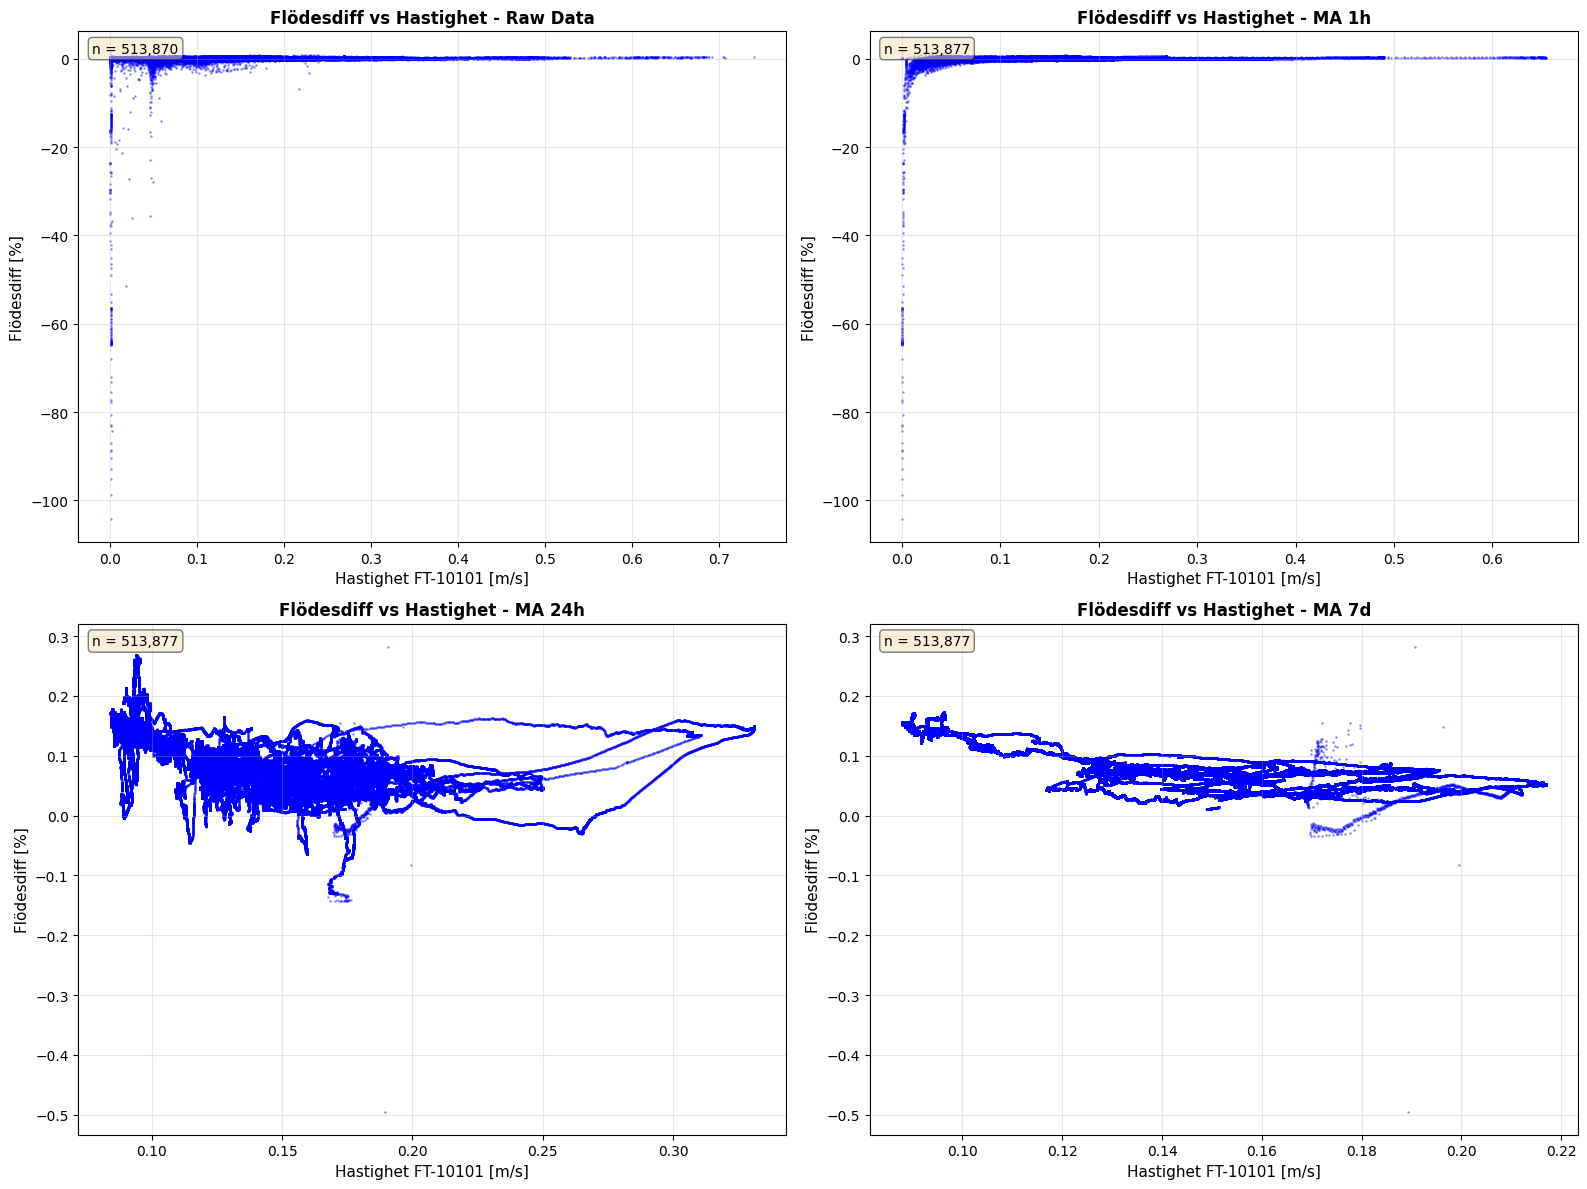

Created 4 scatter plots:
  1. Raw velocity vs Diff_MA_1h
  2. Velocity MA_1h vs Diff_MA_1h
  3. Velocity MA_24h vs Diff_MA_24h
  4. Velocity MA_7d vs Diff_MA_7d


In [ ]:
# Create 4 separate XY scatter plots: Velocity (X) vs Flow Difference (Y)
# 1. Raw data (no MA)
# 2. MA_1h vs MA_1h
# 3. MA_24h vs MA_24h
# 4. MA_7d vs MA_7d

import matplotlib.pyplot as plt

# Define the pairs to plot: (velocity_column, flowdiff_column, title_suffix)
plot_pairs = [
    ('Inflöde FT-10101 [m/s]', 'Diff_MA_1h', 'Raw Data'),
    ('Inflöde FT-10101 [m/s]_MA_1h', 'Diff_MA_1h', 'MA 1h'),
    ('Inflöde FT-10101 [m/s]_MA_24h', 'Diff_MA_24h', 'MA 24h'),
    ('Inflöde FT-10101 [m/s]_MA_7d', 'Diff_MA_7d', 'MA 7d')
]

# Create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, (velocity_col, flowdiff_col, title_suffix) in enumerate(plot_pairs):
    ax = axes[idx]
    dprint(flowdiff_col)
    # Get non-NaN pairs only
    mask = df_velocity_aligned[velocity_col].notna() & df_flowdiff_aligned[flowdiff_col].notna()
    x_data = df_velocity_aligned.loc[mask, velocity_col]
    y_data = df_flowdiff_aligned.loc[mask, flowdiff_col]
    
    # Create scatter plot
    ax.scatter(x_data, y_data, alpha=0.3, s=1, color='blue')
    
    ax.set_xlabel('Hastighet FT-10101 [m/s]', fontsize=11)
    ax.set_ylabel('Flödesdiff [%]', fontsize=11)
    ax.set_title(f'Flödesdiff vs Hastighet - {title_suffix}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Add data point count
    ax.text(0.02, 0.98, f'n = {mask.sum():,}', 
            transform=ax.transAxes, 
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("Created 4 scatter plots:")
print("  1. Raw velocity vs Diff_MA_1h")
print("  2. Velocity MA_1h vs Diff_MA_1h")
print("  3. Velocity MA_24h vs Diff_MA_24h")
print("  4. Velocity MA_7d vs Diff_MA_7d")

In [ ]:
# # Cross-Correlation Analysis
# from scipy.signal import correlate
# import numpy as np

# # Calculate cross-correlation
# correlation = correlate(df_ax['Inflöde FT-10101'].fillna(0), 
#                         df_ax['Utflöde FT-72101'].fillna(0), 
#                         mode='full')

# # Find the lag that gives maximum correlation
# lags = np.arange(-len(df_ax) + 1, len(df_ax))
# optimal_lag_idx = np.argmax(correlation)
# optimal_lag = lags[optimal_lag_idx]

# print(f"Optimal lag: {optimal_lag} minutes")

Optimal lag: -7 minutes


In [ ]:
# # Time-Shift the Outlet Data and Calculate Lag-Compensated Flow Balance
# # Shift outlet data backward by the lag period
# lag_minutes = -7  # Adjust this as needed; 0 should make lag-comp = standard if formulas match

# df_ax['Utflöde FT-72101_shifted'] = df_ax['Utflöde FT-72101'].shift(lag_minutes)
# df_ax['Inflöde Extenslam FT80101_shifted'] = df_ax['Inflöde Extenslam FT80101'].shift(lag_minutes)
# df_ax['Utflöde Bräddning LT23101_shifted'] = df_ax['Utflöde Bräddning LT23101'].shift(lag_minutes)

# # Calculate raw lag-compensated flow difference (Method B: ratio then MA applied to ratio)
# total_inflow = df_ax['Inflöde FT-10101'] + df_ax['Inflöde Extenslam FT80101_shifted']
# total_outflow_shifted = df_ax['Utflöde FT-72101_shifted'] + df_ax['Utflöde Bräddning LT23101_shifted']
# raw_denominator = total_inflow.replace(0, pd.NA)
# df_flowdiff_lagcomp_raw = (total_inflow - total_outflow_shifted) / raw_denominator
# df_flowdiff_lagcomp_raw.name = 'Diff_Lag_Raw'

# # Moving averages of the raw lag-compensated ratio (Method B continued)
# df_flowdiff_lagcomp_ma_of_raw = pd.DataFrame(index=df_flowdiff_lagcomp_raw.index)
# windows_lagcomp = {'1h': '60min', '24h': '24h', '7d': '7D'}
# for w_label, w_offset in windows_lagcomp.items():
#     ma = df_flowdiff_lagcomp_raw.rolling(w_offset, min_periods=1).mean()
#     ma_col_name = f"Diff_Lag_MAofRaw_{w_label}"
#     df_flowdiff_lagcomp_ma_of_raw[ma_col_name] = ma

# # Method A: Ratio of moving averages (matches original df_flowdiff construction logic)
# # Original df_flowdiff computed: (MA(InflowMain)+MA(Externslam) - MA(OutflowMain) - MA(Bräddning)) / (MA(InflowMain)+MA(Externslam))
# # Here we reproduce that with the shifted outflow column.
# df_flowdiff_lagcomp_ratio_of_mas = pd.DataFrame(index=df_ax.index)
# for w_label, w_offset in windows_lagcomp.items():
#     inflow_ma = df_ax['Inflöde FT-10101'].rolling(w_offset, min_periods=1).mean()
#     externslam_ma = df_ax['Inflöde Extenslam FT80101'].rolling(w_offset, min_periods=1).mean()
#     outflow_ma_shifted = df_ax['Utflöde FT-72101_shifted'].rolling(w_offset, min_periods=1).mean()
#     braddning_ma = df_ax['Utflöde Bräddning LT23101'].rolling(w_offset, min_periods=1).mean()
#     denom = (inflow_ma + externslam_ma)
#     denom = denom.where(denom != 0, pd.NA)  # avoid division by zero
#     diff_ratio_ma = (inflow_ma + externslam_ma - outflow_ma_shifted - braddning_ma) / denom
#     df_flowdiff_lagcomp_ratio_of_mas[f'Diff_Lag_RatioOfMAs_{w_label}'] = diff_ratio_ma

# # Combine all lag-comp variants
# df_flowdiff_lagcomp_all = pd.concat([
#     df_flowdiff_lagcomp_raw,
#     df_flowdiff_lagcomp_ma_of_raw,
#     df_flowdiff_lagcomp_ratio_of_mas
# ], axis=1)

# # Merge with original flow differences
# # NOTE: df_flowdiff already contains Diff_MA_* (ratio-of-MAs) for unshifted case.
# df_flowdiff_compensated = pd.merge(df_flowdiff, df_flowdiff_lagcomp_all, left_index=True, right_index=True, how='outer')

# print("\nLag-compensated flow differences created:")
# print("  Columns:", df_flowdiff_lagcomp_all.columns.tolist())
# print("  Shape:", df_flowdiff_lagcomp_all.shape)
# print("\nLegend:")
# print("  Diff_Lag_Raw                -> Raw lag-compensated instantaneous ratio")
# print("  Diff_Lag_MAofRaw_<window>   -> Moving average applied AFTER ratio (Method B)")
# print("  Diff_Lag_RatioOfMAs_<window>-> Ratio of moving averages (Method A, comparable to Diff_MA_<window> when lag_minutes=0)")

# # Optional sanity check when lag_minutes == 0
# if lag_minutes == 0:
#     for w in windows_lagcomp.keys():
#         col_a = f'Diff_MA_{w}'
#         col_b = f'Diff_Lag_RatioOfMAs_{w}'
#         if col_a in df_flowdiff.columns and col_b in df_flowdiff_compensated.columns:
#             diff_series = (df_flowdiff_compensated[col_a] - df_flowdiff_compensated[col_b]).abs()
#             print(f"Window {w}: median abs difference between original and lag-comp RatioOfMAs: {diff_series.median():.6g}")
#             print(f"             95th percentile abs difference: {diff_series.quantile(0.95):.6g}")




Lag-compensated flow differences created:
  Columns: ['Diff_Lag_Raw', 'Diff_Lag_MAofRaw_1h', 'Diff_Lag_MAofRaw_24h', 'Diff_Lag_MAofRaw_7d', 'Diff_Lag_RatioOfMAs_1h', 'Diff_Lag_RatioOfMAs_24h', 'Diff_Lag_RatioOfMAs_7d']
  Shape: (530705, 7)

Legend:
  Diff_Lag_Raw                -> Raw lag-compensated instantaneous ratio
  Diff_Lag_MAofRaw_<window>   -> Moving average applied AFTER ratio (Method B)
  Diff_Lag_RatioOfMAs_<window>-> Ratio of moving averages (Method A, comparable to Diff_MA_<window> when lag_minutes=0)


In [ ]:
# print(f"\nLag-compensated flow differences created:")
# print(f"  Columns: {df_flowdiff_lagcomp_all.columns.tolist()}")
# print(f"  Shape: {df_flowdiff_lagcomp_all.shape}")

# if __name__ == "__main__":
#     import sys as _sys
#     from IPython import get_ipython

#     def _make_and_show():
#         app = QApplication.instance() or QApplication(_sys.argv)
        
#         # Calculate total number of series for settings file key
#         n_series_flows = len(df_flows.columns) + len(df_flowdiff.columns)
#         settings_key = f'Flöden och Flödesdiff laggkomp ({n_series_flows} series)'
#         print(f"Chart settings key: {settings_key}")
        
#         mainWin = IPW(df_axL = df_flows,
#                             df_axL_Title = 'Flöde & Bräddflöde laggkompensation [m3/h]', 
#                             df_axR = df_flowdiff_compensated, 
#                             df_axR_Title = 'Flödesdiff [%]',
#                             WindowTitle='Pajala ARV Flöde med laggkompensation',
#                             settings_file=f'InteractivePlotWindow.json::{settings_key}'
#                         )
#         mainWin.show()
#         # Keep references to avoid garbage collection in notebook kernels.
        
#         # Store on the app and module globals so the objects persist after this function returns.
#         try:
#             app._pajala_mainWin = mainWin
#         except Exception:
#             pass
#         globals()['_pajala_mainWin'] = mainWin
#         globals()['_pajala_app'] = app
#         return app

#     # If running inside an IPython kernel (notebook), request IPython to enable the Qt event loop
#     if 'ipykernel' in _sys.modules:
#         try:
#             ip = get_ipython()
#             if ip is not None:
#                 # enable GUI event loop integration; this avoids a blocking app.exec() call
#                 ip.run_line_magic('gui', 'qt')
#         except Exception:
#             ip = None
#         # Create and show window but do NOT call app.exec() - the event loop is managed by IPython
#         app = _make_and_show()
#         # Keep references in the IPython user namespace if available so users can interact with them
#         if ip is not None:
#             try:
#                 ip.user_ns['_pajala_app'] = app
#                 ip.user_ns['_pajala_mainWin'] = globals().get('_pajala_mainWin')
#             except Exception:
#                 # Fall back to module globals (already set by _make_and_show)
#                 pass
#     else:
#         # Running as a script: start the blocking event loop
#         app = _make_and_show()
#         _sys.exit(app.exec())


Lag-compensated flow differences created:
  Columns: ['Diff_Lag_Raw', 'Diff_Lag_MAofRaw_1h', 'Diff_Lag_MAofRaw_24h', 'Diff_Lag_MAofRaw_7d', 'Diff_Lag_RatioOfMAs_1h', 'Diff_Lag_RatioOfMAs_24h', 'Diff_Lag_RatioOfMAs_7d']
  Shape: (530705, 7)
Chart settings key: Flöden och Flödesdiff laggkomp (24 series)


c:\Users\chrini\sourceGit\chrisgladious\InteractiveFlowCharts\src\InteractivePlotWindow.py:1269: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.canvas.draw()
c:\Users\chrini\sourceGit\chrisgladious\InteractiveFlowCharts\src\InteractivePlotWindow.py:1269: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  self.canvas.draw()
c:\Users\chrini\sourceGit\chrisgladious\InteractiveFlowCharts\src\InteractivePlotWindow.py:1269: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  self.canvas.draw()


In [ ]:
# Calculate cumulative volumes
df_cumsumflows = pd.DataFrame(index=df_ax.index)
df_cumsumflows['Inflöde FT-10101_[m3]]'] = df_ax['Inflöde FT-10101'].cumsum()
df_cumsumflows['Inflöde Extenslam FT80101_[m3]'] = df_ax['Inflöde Extenslam FT80101'].cumsum()
df_cumsumflows['Utflöde FT-72101_[m3]'] = df_ax['Utflöde FT-72101'].cumsum()
df_cumsumflows['MBBRflöde FT30101_[m3]'] = df_ax['MBBRflöde FT30101'].cumsum()
df_cumsumflows['Utflöde Bräddning LT23101_[m3]'] = df_ax['Utflöde Bräddning LT23101'].cumsum()

df_cumsumflows['Inflow_[m3]'] = (df_ax['Inflöde FT-10101'] + 
                          df_ax['Inflöde Extenslam FT80101']).cumsum()
df_cumsumflows['Outflow_[m3]'] = (df_ax['Utflöde FT-72101'] + 
                           df_ax['Utflöde Bräddning LT23101']).cumsum()

# Storage change = Cumulative inflow - Cumulative outflow
df_cumsumflows['Storage_Change_[m3]'] = df_cumsumflows['Inflow_[m3]'] - df_cumsumflows['Outflow_[m3]']
df_cumsumflows['Storage_Change_Percent'] = df_cumsumflows['Storage_Change_[m3]'] / df_cumsumflows['Inflow_[m3]'] * 100.0
# df_flow_cumsum = pd.merge(df_flows,df_cumsumflows, left_index=True, right_index=True, how='outer'                          )

In [ ]:
from InteractivePlotWindow import InteractivePlotWindow as IPW
from PyQt6.QtWidgets import QApplication

if __name__ == "__main__":
    import sys as _sys
    from IPython import get_ipython

    def _make_and_show():
        app = QApplication.instance() or QApplication(_sys.argv)
        
        # Calculate total number of series for settings file key
        n_series_flows = len(df_flows.columns) + len(df_flowdiff.columns)
        settings_key = f'Kumsumflöden in och ut ({n_series_flows} series)'
        print(f"Chart settings key: {settings_key}")
        
        mainWin = IPW(df_axL = df_flows,
                            df_axL_Title = 'Flöde [m3/h]', 
                            df_axR = df_cumsumflows, 
                            df_axR_Title = 'Kumsumflöde [m3]',
                            WindowTitle='Pajala ARV Flöden och kumsumflöden',
                            settings_file=f'InteractivePlotWindow.json::{settings_key}'
                        )
        mainWin.show()
        # Keep references to avoid garbage collection in notebook kernels.
        
        # Store on the app and module globals so the objects persist after this function returns.
        try:
            app._pajala_mainWin = mainWin
        except Exception:
            pass
        globals()['_pajala_mainWin'] = mainWin
        globals()['_pajala_app'] = app
        return app

    # If running inside an IPython kernel (notebook), request IPython to enable the Qt event loop
    if 'ipykernel' in _sys.modules:
        try:
            ip = get_ipython()
            if ip is not None:
                # enable GUI event loop integration; this avoids a blocking app.exec() call
                ip.run_line_magic('gui', 'qt')
        except Exception:
            ip = None
        # Create and show window but do NOT call app.exec() - the event loop is managed by IPython
        app = _make_and_show()
        # Keep references in the IPython user namespace if available so users can interact with them
        if ip is not None:
            try:
                ip.user_ns['_pajala_app'] = app
                ip.user_ns['_pajala_mainWin'] = globals().get('_pajala_mainWin')
            except Exception:
                # Fall back to module globals (already set by _make_and_show)
                pass
    else:
        # Running as a script: start the blocking event loop
        app = _make_and_show()
        _sys.exit(app.exec())

Chart settings key: Kumsumflöden in och ut (24 series)
